# Bootstrapping and Confidence Intervals

> Using the bootstrap to construct confidence intervals

The main benefit of the bootstrap is that it allows statisticians to set confidence intervals on parameters without having to make unreasonableassumptions.

In [28]:
def clt(x):
    
    titanic_yes = titanic[titanic['survived']== 1][x]
    titanic_no = titanic[titanic['survived']== 0][x]
    
    mean_yes = [] # Wadah (data structure) kita untuk menyimpan rata-rata parameter orang-orang yang bertahan
    mean_no = [] # Wadah (data structure) kita untuk menyimpan rata-rata parameter orang-orang yang tidak bertahan
    
    for i in range(1000): # Kita lakukan 1000 resampling, kita masukkan ke semua wadah yang tadi kita sudah siapkan
        mean_yes.append(titanic_yes.sample(len(titanic_yes), replace = True).mean())
        mean_no.append(titanic_no.sample(len(titanic_no), replace = True).mean())   
    
    #Confidence level = 0.95, significance level = 0.05
    titanic_yes_lower = np.percentile(mean_yes, 25)
    titanic_yes_upper = np.percentile(mean_yes, 75)
    titanic_no_lower = np.percentile(mean_no, 25)
    titanic_no_upper = np.percentile(mean_no, 75)
    
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Bootstrap distribution of the mean ({})'.format(x))    
        
    txt_yes_lower = str(round(titanic_yes_lower,2))
    txt_yes_upper = str(round(titanic_yes_upper,2))
    txt_no_lower = str(round(titanic_no_lower,2))
    txt_no_upper = str(round(titanic_no_upper,2))
    
    #membuat garis conf.level
    ax.axvline(titanic_yes_lower, linestyle = '--')
    ax.axvline(titanic_yes_upper, linestyle = '--')
    ax.axvline(titanic_no_lower, c = 'red',  linestyle = '--')
    ax.axvline(titanic_no_upper, c = 'red', linestyle = '--')
    
    #membuat Text    
    ax.text(titanic_yes_lower, .2, ha='center', va='center', rotation = 'vertical', s = txt_yes_lower,
            backgroundcolor='white')
    ax.text(titanic_yes_upper, .2, ha='center', va='center', rotation = 'vertical', s = txt_yes_upper,
            backgroundcolor='white')
    ax.text(titanic_no_lower, .2, ha='center', va='center', rotation = 'vertical', s = txt_no_lower,
            backgroundcolor='white')
    ax.text(titanic_no_upper, .2, ha='center', va='center', rotation = 'vertical', s = txt_no_upper,
           backgroundcolor='white')

    # Kita plot kumpulan rata-rata paramater yang sudah dikumpulkan, hasilnya pasti berbentuk distribusi normal
    # Kalau bingung kenapa, pasti distribusi normal, ingat Central Limit Theorem (CLT)
    sns.distplot(mean_yes, hist = False, label = 'Survived', ax = ax)  
    sns.distplot(mean_no, hist = False, label = 'Not Survived', color = 'red', ax = ax)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.dropna(inplace = True)

# Boostraping (resampling)

Bootstrapping is a <b>statistical procedure that resamples a single dataset to create many simulated samples.</b> This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics. 

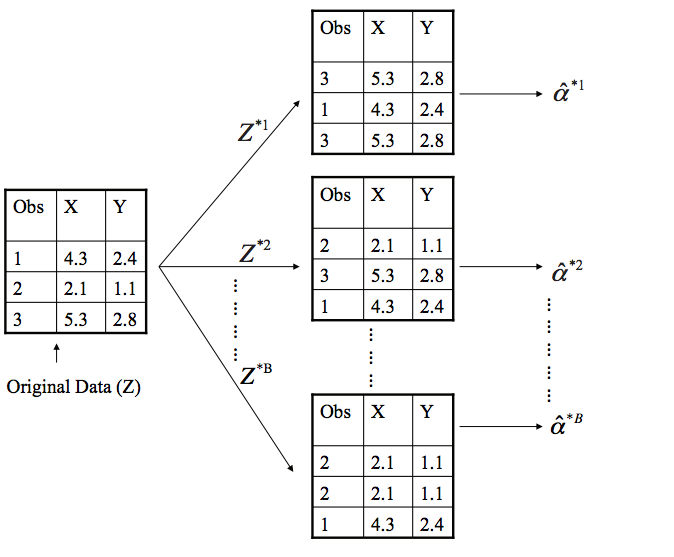

In [13]:
Image(filename='boot.png') 

# Bootstrap Distribution

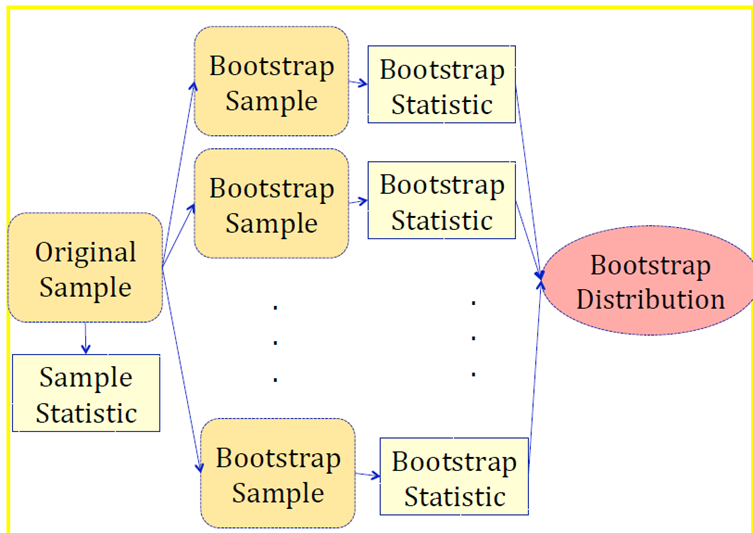

In [12]:
Image(filename='bootstrap.png') 

## Central Limit Theorem

The central limit theorem is a fundamental theorem of probability and statistics. <b>The theorem states that the distribution of the mean of a random sample from a population with finite variance is approximately normally distributed when the sample size is large, regardless of the shape of the population's distribution.</b>

> The central limit theorem states that the distribution of an aggregated measure (mean, median, standard deviation, etc) of samples with finite variance pulled from a single population follows a normal distribution.

> Ketika kita melakukan sample secara berulang, maka dia akan menjadi distribusi normal (Gaussian) dikarenakan <b>Central Limit Theorem (CLT)</b>

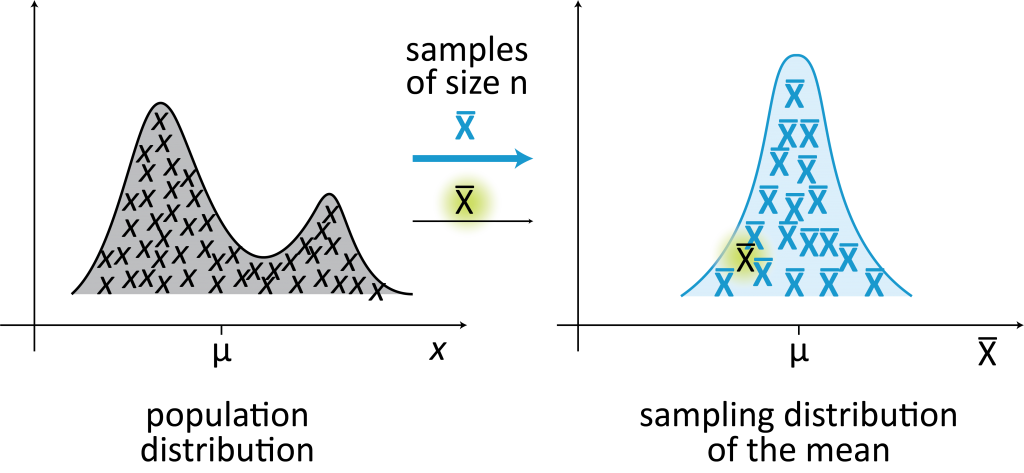

In [29]:
Image(filename='clt2.png') 

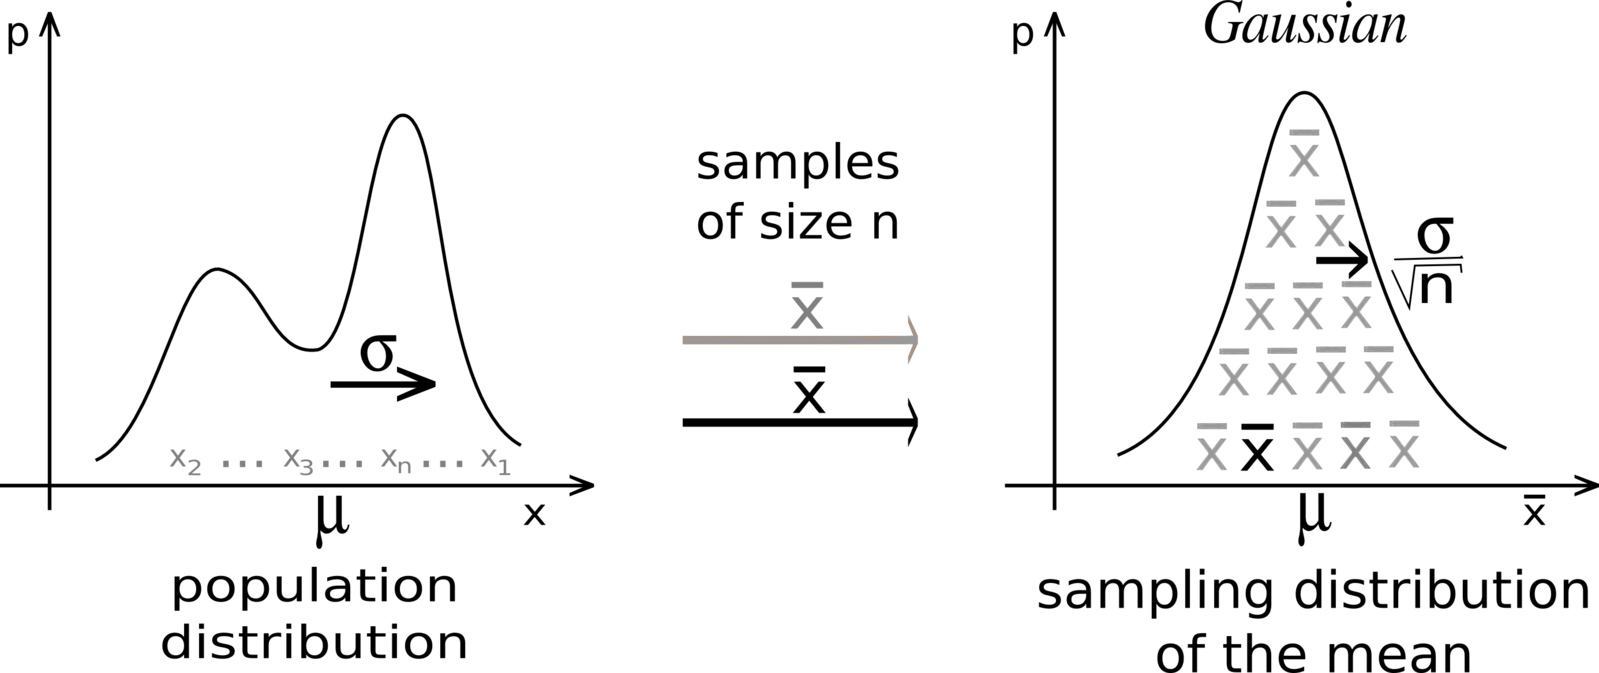

In [20]:
Image(filename='clt.png') 

## Confidence Interval

Confidence interval yang biasa kita pakai adalah 95% atau 0.95 dengan significance level 5% atau 0.05. Itu adalah sisa luasnya. Ingat seluruh luas probability distribution itu 1 atau mudahnya, luas probability distribution adalah peluang.

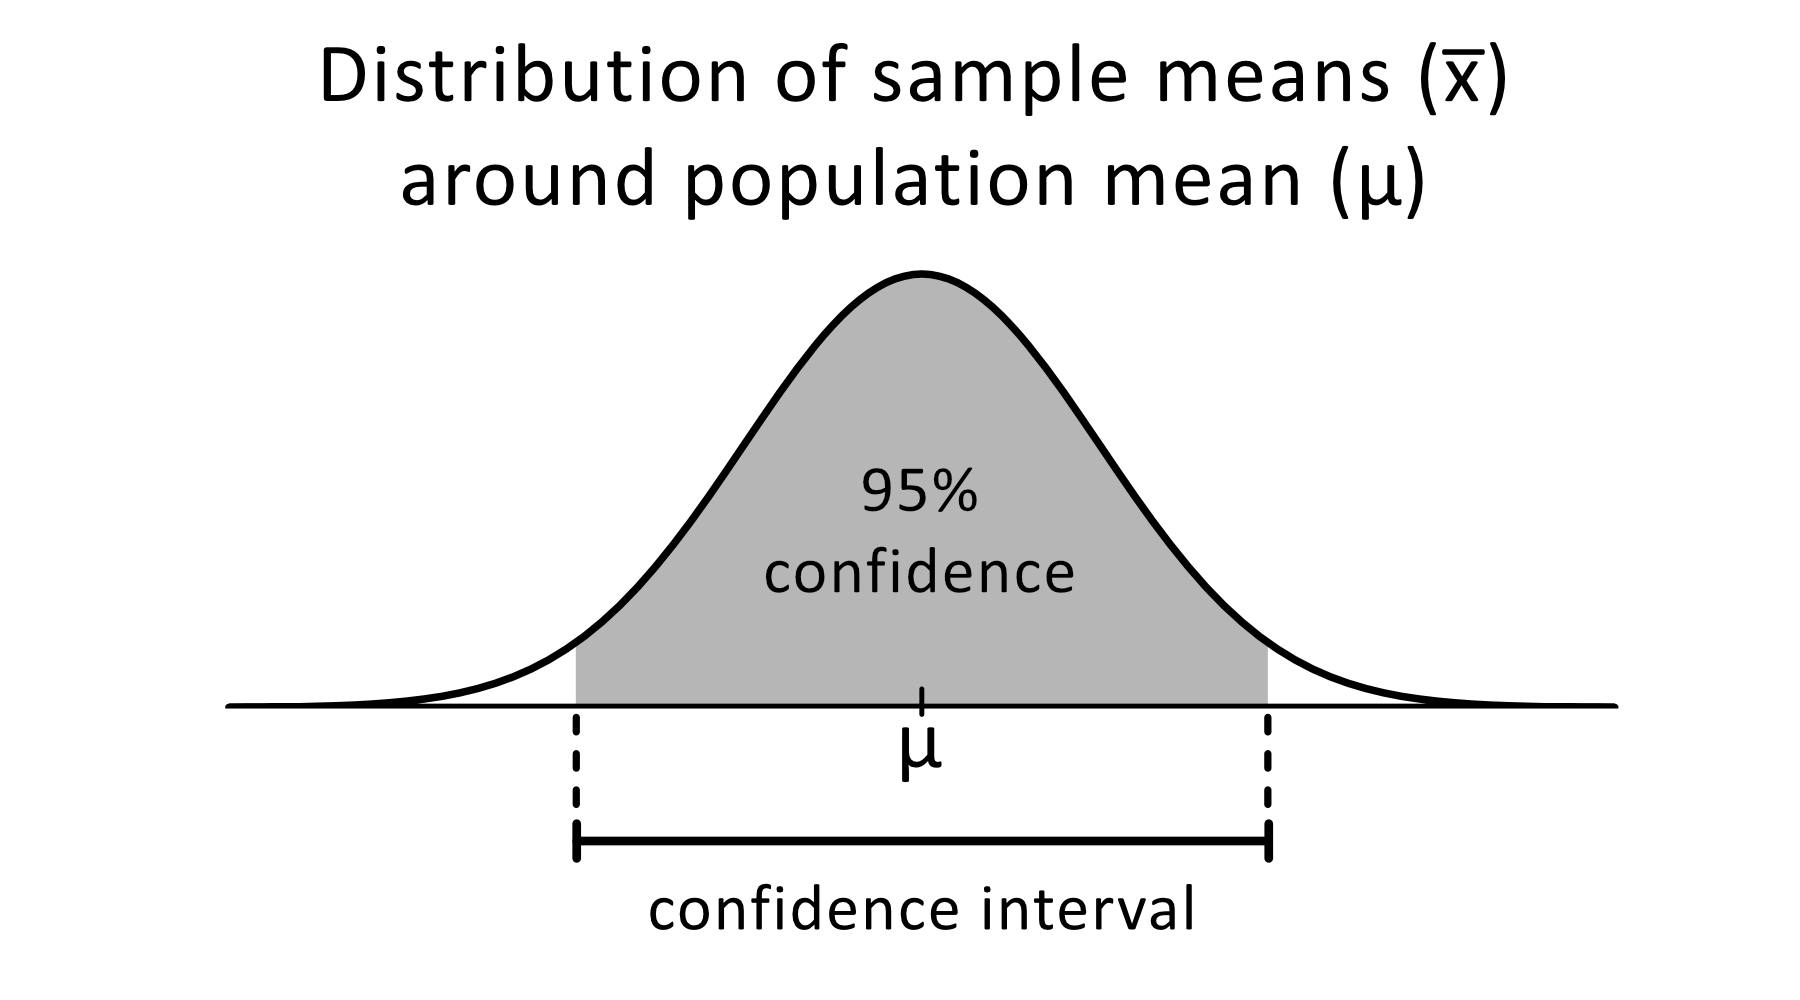

In [21]:
Image(filename='ci.png') 

# The Conclusion

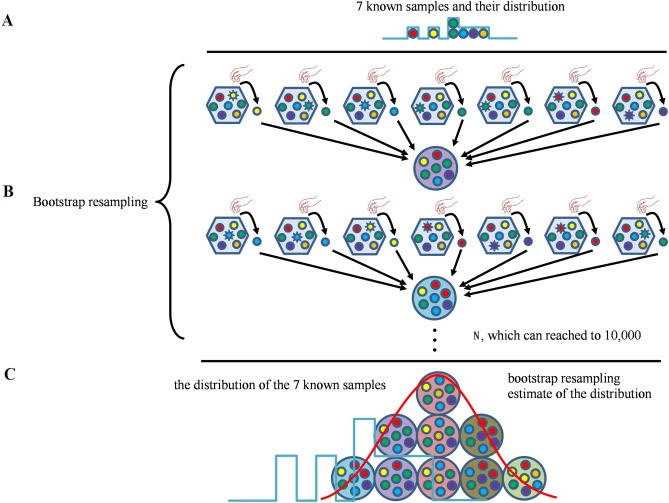

In [25]:
Image(filename='sampling.jpg') 

# In Practice

## Dalam kasus ini, saya hanya memperlihatkan penggunakan parameter statistik untuk rata-rata.

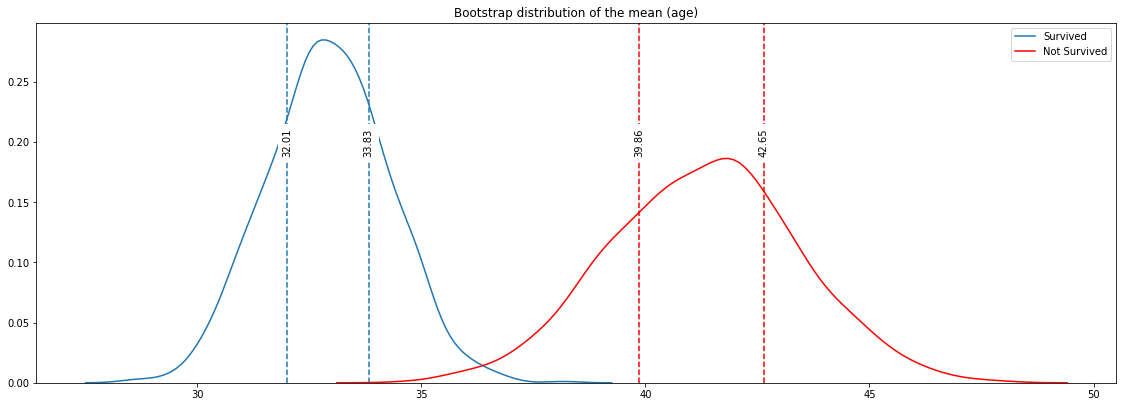

In [19]:
clt('age')

> Dapat dilihat confidence intervalnya:

* Untuk orang yang survived secara populasi umur mereka diantara umur 32.01 dan 33.83
* Sedangkan untuk orang yang tidak survived secara populasi umur mereka diantara umur 39.86 dan 42.56

Secara matematik:

$$\mu_{survived} = 32.01\leq \bar{x} \leq 33.83$$

$$\mu_{Notsurvived} = 39.86\leq \bar{x} \leq 42.65$$